In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [2]:
H1 = 1.4 / 100
H2 = 3.8 / 100
Lp = 24.1 / 100
Lc = 6.5 / 100
R = 3.5 / 100
m = 0.161
I = 3/5 * m * R**2 #Inercia de un cono doble.

angulo = 30

# Funciones

In [3]:
def velocidad(x, angle):
    angle = angle * np.pi / 180
    r = R*(1 - (x / Lc) * np.tan(angle/2)) #Radio de curvatura en funcion de x
    H = (H2 - H1)*x /(Lp * np.cos(angle / 2)) + H1 #Altura del riel (x)

    h1 = H[0] + r[0]  #Altura inicial
    h2 = H + r
    
    vel = np.sqrt(2*9.8*(h1 - h2) / (1+I/(m * (r**2) )) )
    
    return vel

def error(y, ysim, r = 2):
    E = np.sqrt(np.mean((y - ysim)**2))
    return np.round(E * 100, r)

def desv(lista, x, x_prom):
    up = []
    nt = len(lista)
    for i in range(nt):
        up.append((lista[i][x] - x_prom[x])**2)
    std = np.sqrt(sum(up) / (nt-1))
    return std

def legends():
    plt.ylabel("Velocidad CM ($m/s$)")
    plt.xlabel("Distancia recorrida ($m$)")
    plt.grid(linestyle=':', linewidth=1.5)

In [4]:
#Set of DataFrames

nt = 5 #Numero de tablas
experimento = []
for i in range(nt):
    experimento.append(pd.read_excel("tablas\\{}.xlsx".format(i + 1), skiprows = 1))
#Data frame promediado. 

df_prom = sum(experimento) / nt #Prom DataFrames


# Gráfica Promedios

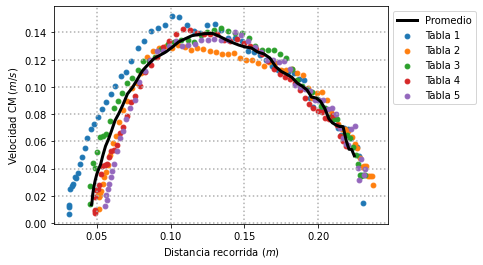

In [5]:
for i in range(nt):
    plt.scatter(experimento[i]["x"], experimento[i]["v"], s = 23, label  = "Tabla {}".format(i + 1))
plt.plot(df_prom["x"], df_prom["v"], "k", label = "Promedio", lw = 3)
plt.legend(loc = "upper left", bbox_to_anchor=(1, 1))
legends()

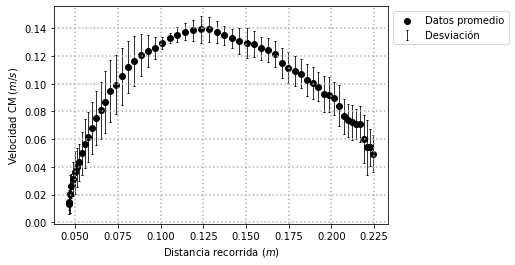

In [6]:
plt.scatter(df_prom["x"], df_prom["v"], color = "Black", label = "Datos promedio")
desv_y= desv(experimento, "v", df_prom)

plt.errorbar(df_prom["x"], df_prom["v"], yerr = desv_y, fmt = " ",
             ecolor = "Black", color = "Black", elinewidth=0.8, capsize = 1, zorder = 0, label = "Desviación")
legends()
plt.legend(loc = "upper left", bbox_to_anchor=(1, 1), fontsize = 10)


# Simulación vs Experimental

### Graficas individuales

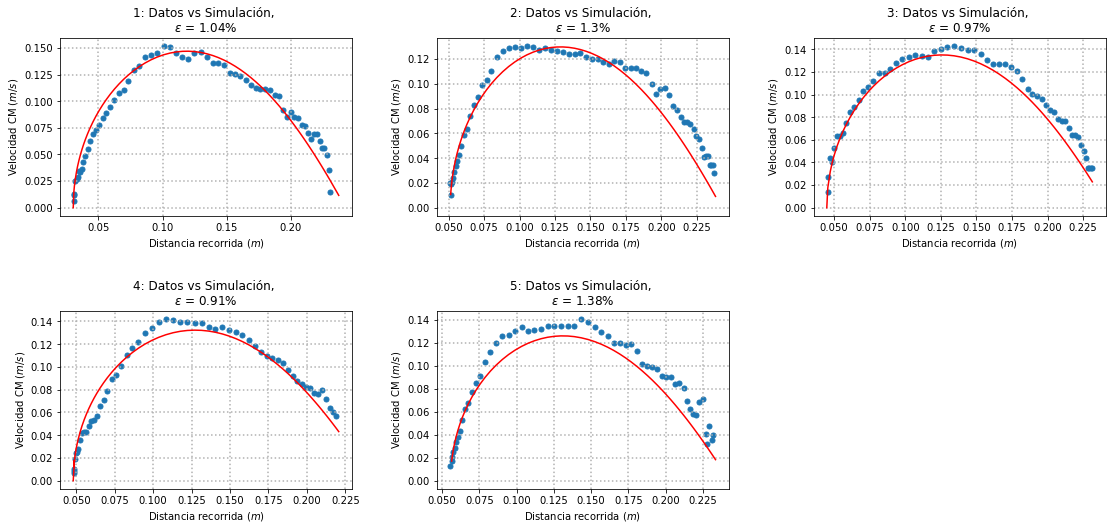

In [7]:
figure = plt.figure(figsize=(16,8))
np.warnings.filterwarnings('ignore') #Desactivar warnings

for i in range(nt):
    plt.subplot(2, 3, i + 1)
    plt.plot(experimento[i]["x"], velocidad(experimento[i]["x"], angulo), "r",  label = "Simulación")
    plt.scatter(experimento[i]["x"], experimento[i]["v"], s = 25,color = "C0", label = "Datos Experimentales")

    E2 = error(experimento[i]["v"], velocidad(experimento[i]["x"], angulo), 2) #Error de expertemiento
    plt.title("{}: Datos vs Simulación, \n$\\varepsilon$ = {}%".format(i + 1, E2))
    
    legends()

figure.tight_layout(pad=3.0) #Añadir espacios entre subplots
plt.savefig("datos\\set_figures.jpg")

### Grafica General

Nota: Esto se hace porque el valor más probable de una variable es el promedio de las mediciones realizadas

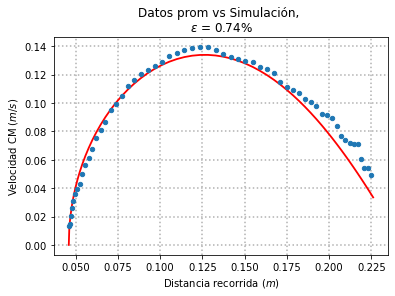

<Figure size 432x288 with 0 Axes>

In [8]:
vel_sim = velocidad(df_prom["x"], 30)

plt.plot(df_prom["x"], vel_sim, "r", label = "Simulación", lw = 1.8, zorder = 2)
plt.scatter(df_prom["x"], df_prom["v"], label = "Data", s = 19, zorder = 3)


#Por si se me da la gana de gráficar las desviaciones.
#plt.errorbar(df_prom["x"], df_prom["v"], yerr = desv_y, fmt = " ", ecolor = "Black", elinewidth=0.7, capsize = 1, zorder = 1, label = "Desviación")

E1 = error(df_prom["v"], vel_sim)
plt.title("Datos prom vs Simulación, \n$\\varepsilon$ = {}%".format(E1))
legends()
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=9)
plt.show()
plt.savefig("datos\\figure.jpg")

# Apendice.

### Cálculo de error
- Para el cálculo del error se uso la siguiente formula:

$\varepsilon =RMSE=\sqrt{\sum\frac{(y-y_{sim})^2}{N}}$